## Importing libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {"grid.color": ".6",
						"grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score

## Aim :

This notebook is designed to build a machine learning model to predict gold prices based on various economic and financial factors. The goal is to analyze historical data and identify important factors such as the **US Dollar Index**, **crude oil prices**, **interest rates**, **stock market indices**, and **inflation rates** that affect gold prices. The process includes cleaning and preparing the data, exploring patterns and trends through visualizations, and using machine learning models like **Linear Regression**, **Random Forest**, and **Gradient Boosting** to make accurate predictions. The model’s performance will be evaluated using metrics such as **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**. By the end, this notebook will provide both a reliable prediction model and insights into the factors influencing gold prices.


### Dataset

In [81]:

df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\gold_price_data.csv", parse_dates=["Date"])

In [82]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [83]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Dataset Description: Gold Price and Market Indicators

This dataset provides a comprehensive view of the relationship between gold prices, stock market indices, oil prices, silver prices, and currency exchange rates. It includes **2290 records** with no missing values, making it an excellent resource for analyzing financial and commodity market trends over time.

## Column Descriptions

| **Column Name** | **Data Type** | **What It Represents** |
|------------------|---------------|-------------------------|
| **Date**         | Date (String) | The date for each record, formatted as MM/DD/YYYY. This is the time reference for the dataset. |
| **SPX**          | Numeric       | The value of the **S&P 500 Index**, a benchmark for the performance of 500 large companies listed in the US. |
| **GLD**          | Numeric       | The price of **Gold**, tracked via the SPDR Gold Shares ETF. Gold prices are often seen as a reflection of economic stability. |
| **USO**          | Numeric       | The price of **Crude Oil**, tracked using the United States Oil Fund ETF. This indicates trends in the oil market. |
| **SLV**          | Numeric       | The price of **Silver**, tracked via the iShares Silver Trust ETF. Silver is another key commodity with a role in market analysis. |
| **EUR/USD**      | Numeric       | The **Euro-to-US Dollar exchange rate**, a key currency pair in global foreign exchange markets. |

---

## Why Use This Dataset?

This dataset is valuable for:
- **Financial Analysis**: Exploring how gold prices correlate with stock indices, oil prices, and currency exchange rates.
- **Commodity Market Trends**: Understanding the price movement of precious metals (gold and silver) over time.
- **Macroeconomic Insights**: Examining how global events and economic changes influence market indicators like the S&P 500 and currency exchange rates.

---

## Key Insights:
1. **Gold (GLD)** and **Silver (SLV)** prices often act as economic hedges during market instability.
2. **SPX (S&P 500 Index)** reflects stock market trends and investor sentiment.
3. The **EUR/USD exchange rate** connects this data to global financial markets, providing a forex dimension.
4. **USO (Crude Oil)** prices are critical for understanding energy market dynamics and their effect on global trade.

---


### Data Cleaning

In [84]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [85]:
duplicates = df.duplicated().sum()

In [86]:
df.sort_values(by='Date', inplace=True)

In [87]:
 duplicates, df.head()

(np.int64(0),
         Date          SPX        GLD        USO     SLV   EUR/USD
 0 2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
 1 2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
 2 2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
 3 2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
 4 2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099)

#####  detect outliers from numerical columns

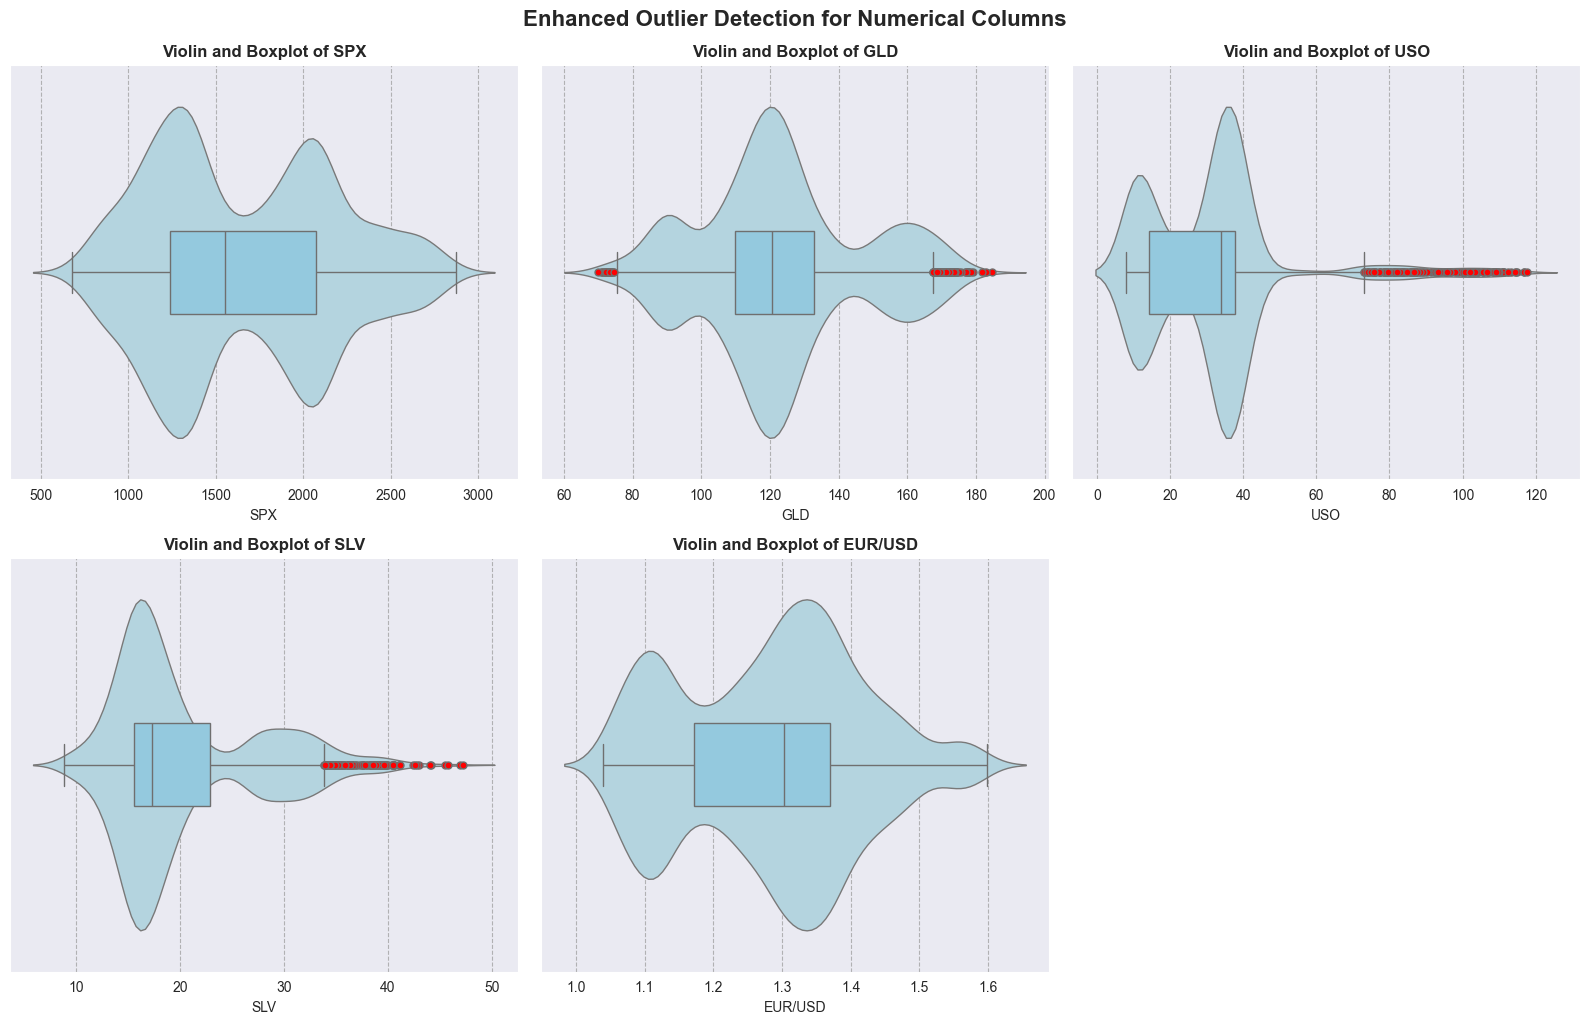

In [88]:
numerical_columns = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']
# Set figure size and layout
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a grid
    sns.violinplot(
        x=df[col], 
        color='lightblue', 
        inner=None, 
        linewidth=1
    )
    sns.boxplot(
        x=df[col],
        color='skyblue',
        width=0.2,
        flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5}
    )
    plt.title(f'Violin and Boxplot of {col}', fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add overall title and adjust layout
plt.tight_layout()
plt.suptitle('Enhanced Outlier Detection for Numerical Columns', fontsize=16, weight='bold', y=1.02)
plt.show()


###### Observations:
The boxplots of the numerical columns (SPX, GLD, USO, SLV, EUR/USD) show the presence of outliers and varying ranges, with some columns exhibiting significant variability and skewness. The position of the median line in the boxplots highlights differences in data distribution across features, which could impact analysis.

###### Conclusion:
Outliers should be addressed using capping or transformation, and feature scaling is necessary to standardize the varying ranges. Skewed features may benefit from transformations like logarithmic scaling. Correlation analysis with the target variable (GLD) is recommended to identify the most relevant predictors for modeling.

#### Correlation Matrix Heatmap

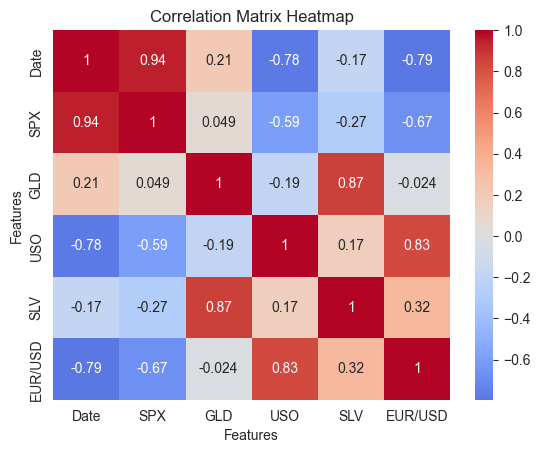

In [89]:
# Calculate correlation matrix
correlation = df.corr()

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
			center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

###### Observations:
The heatmap clearly shows the correlation between numerical features, with positive correlations in red and negative ones in blue, where intensity indicates the strength. Strong correlations, like those between GLD and SPX or GLD and SLV, suggest potential predictive relationships, while weak or negligible correlations may contribute less to the target variable.

###### Conclusion:
Strong correlations offer valuable insights into data relationships and potential predictors. Redundant features with high inter-correlation may benefit from dimensionality reduction techniques like PCA, while features with weak or no correlation to the target should be excluded to reduce noise and simplify the model.

#### "Displaying and Resetting DataFrame Index and Columns"

In [90]:

print(df.index)


df = df.reset_index()


print(df.columns)


RangeIndex(start=0, stop=2290, step=1)
Index(['index', 'Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


#### "Visualization of Gold Price Trend Over Time"

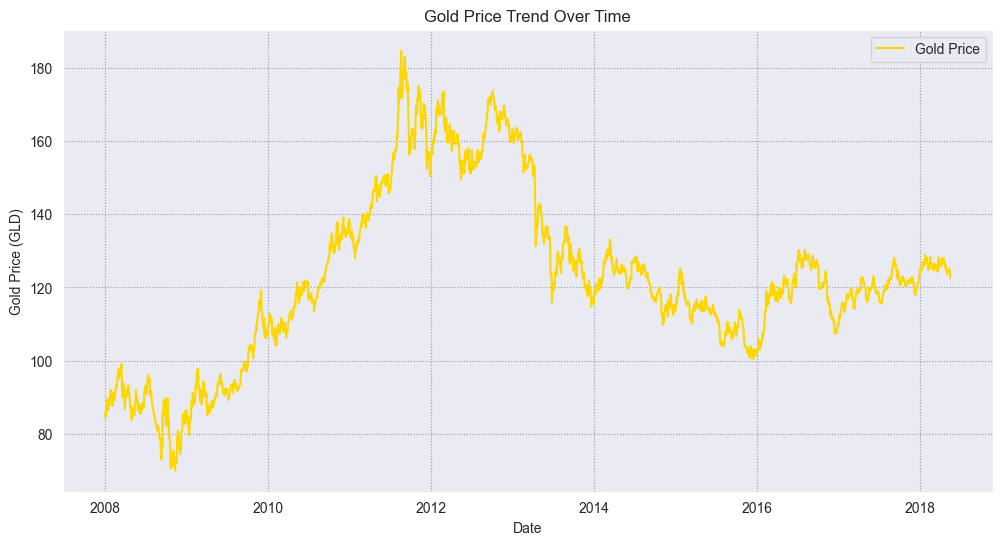

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['GLD'], label='Gold Price', color='gold')
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price Trend Over Time')
plt.legend()
plt.show()


###### Observation:
The plot shows the trend of gold prices (GLD) over time, with the x-axis representing the dates and the y-axis representing the gold price. The gold color of the line emphasizes the price movement, making it easy to identify the fluctuations. The trend provides a visual representation of how gold prices have changed across the dataset's time range.

###### Conclusion:
The graph offers valuable insights into the historical price fluctuations of gold, allowing for the identification of patterns, trends, or volatility. This visual analysis can be used to assess potential predictions or investments based on gold price movements over time.

#### Distribution of Gold Prices (GLD)

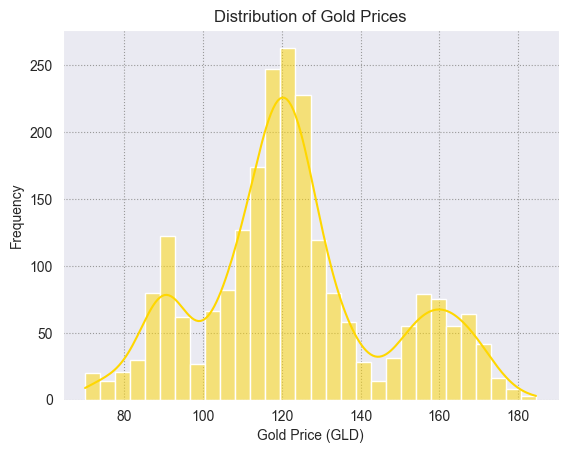

In [92]:
sns.histplot(df['GLD'], kde=True, color='gold', bins=30)
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price (GLD)')
plt.ylabel('Frequency')
plt.show()


###### Observation:
The histogram with a Kernel Density Estimate (KDE) curve illustrates the distribution of gold prices (GLD). The x-axis represents the gold prices, while the y-axis shows the frequency of occurrence. The KDE curve smooths the histogram, giving a clearer view of the price distribution, indicating the concentration and spread of gold prices across the dataset.

###### Conclusion:
This visualization provides insights into the overall distribution of gold prices, revealing whether the prices are skewed, normally distributed, or have any distinct clusters or outliers. Understanding the distribution helps in assessing the variability and central tendencies of gold prices, which is useful for further analysis or forecasting.

#### Gold Price with 30-Day Rolling Average

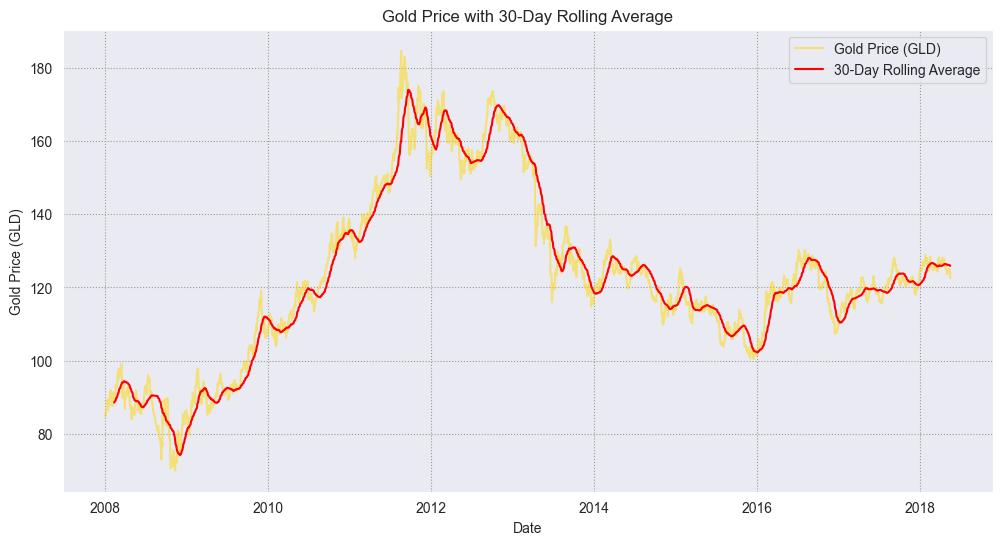

In [93]:
df['GLD_Rolling'] = df['GLD'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['GLD'], label='Gold Price (GLD)', color='gold', alpha=0.5)
plt.plot(df['Date'], df['GLD_Rolling'], label='30-Day Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price with 30-Day Rolling Average')
plt.legend()
plt.show()


###### Observation:
The plot shows the gold prices (GLD) over time along with a 30-day rolling average. The gold line represents the daily gold prices, while the red line represents the 30-day rolling average, providing a smoothed view of the price trend. The rolling average helps to minimize short-term fluctuations and highlight longer-term trends in the data.

###### Conclusion:
The 30-day rolling average smooths out the volatility in gold prices, making it easier to observe the overall trend. By comparing the raw data with the rolling average, it is easier to identify periods of significant change, trends, and any potential shifts in the direction of gold prices. This visualization is useful for identifying long-term movements while filtering out daily price noise.

#### Interactive Gold Price Trend

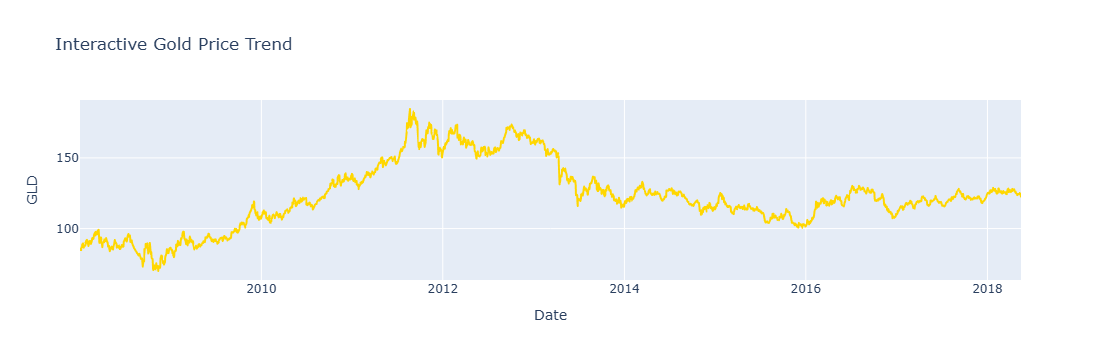

In [94]:
import plotly.express as px

fig = px.line(df, x='Date', y='GLD', title='Interactive Gold Price Trend')
fig.update_traces(line_color='gold')
fig.show()


###### Observation:
This interactive line plot displays the gold prices (GLD) over time, with the x-axis representing the dates and the y-axis representing the gold prices. The line is colored in gold to match the theme. The plot is created using Plotly, allowing for zooming, panning, and tooltips for enhanced interactivity and exploration of the data.

###### Conclusion:
The interactive plot provides a more dynamic way to explore the gold price trend, allowing users to zoom in on specific time periods and examine the fluctuations more closely. This interactive approach is particularly useful for detailed data analysis and can facilitate deeper insights into the behavior of gold prices over time.

#### "Change in Price of Gold Over Time (EUR/USD)"

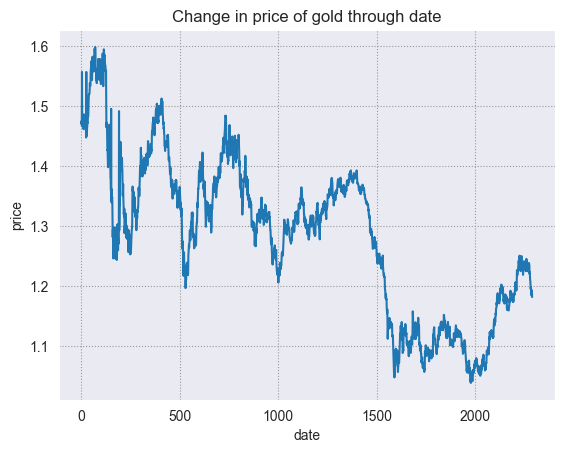

In [95]:
# plot price of gold for each increasing day
df["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

###### Observation:
This plot displays the change in the price of gold over time, with the x-axis representing the dates and the y-axis representing the price (specifically for the EUR/USD exchange rate). The graph visualizes how the gold price fluctuates over the dataset's time range, indicating periods of increase or decrease in the value of gold.

###### Conclusion:
The plot highlights the dynamic changes in the price of gold, showing fluctuations and trends over time. This visualization can be useful for identifying patterns or significant movements in gold prices, which might correlate with external factors like currency exchange rates or market conditions.

#### Splitting Data into Features and Target Variable"

In [96]:
X = df.drop(columns=['Date', 'GLD'])
y = df['GLD']



#### "Splitting Data into Training and Testing Sets"

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### "Training and Evaluating Decision Tree Regressor Model"

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
dt_model = DecisionTreeRegressor(random_state=42)

In [100]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [101]:
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time
# Evaluate the model and measure prediction time
start_time = time.time()
test_score = dt_model.score(X_test, y_test)
prediction_time = time.time() - start_time
train_score = dt_model.score(X_train, y_train)

In [102]:
print("Training Score:", train_score)
print("Testing Score:", test_score)
print("Training Time (seconds):", training_time)
print("Prediction Time (seconds):", prediction_time)

Training Score: 1.0
Testing Score: 0.9950330667914175
Training Time (seconds): 0.04857587814331055
Prediction Time (seconds): 0.004492759704589844


###### Observation:
The Decision Tree Regressor is trained on the data, and its performance is evaluated using the training and testing scores. The training and prediction times are measured to assess computational efficiency.

###### Conclusion:
The model's training and testing scores indicate its fit and generalization ability. The measured times provide insights into the computational efficiency, helping gauge performance on larger datasets.

#### "Evaluating Decision Tree Regressor Model Performance"

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
predictions = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 2.8296683047909545
Mean Absolute Error (MAE): 1.048048807860262
R^2 Score: 0.9950330667914175


###### Observation:
The model's performance is evaluated using three metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score. These metrics provide insights into the accuracy and fit of the model on the test data. MSE measures the average squared difference between actual and predicted values, MAE calculates the average absolute difference, and R² indicates how well the model explains the variance in the target variable.

###### Conclusion:
The evaluation metrics help assess the model's prediction accuracy. Lower MSE and MAE values indicate better performance, while a higher R² score suggests that the model explains more of the variance in the target variable. These metrics are essential for understanding the quality of the model's predictions.

#### "Training and Evaluating Random Forest Regressor Model"

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
clf = RandomForestRegressor(random_state=23)
clf.fit(X_train, y_train)

RandomForestRegressor(random_state=23)

In [109]:
y_pred = clf.predict(X_test)

In [110]:
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time
# Evaluate the model and measure prediction time
start_time = time.time()
test_score_rf= clf.score(X_test, y_test)
train_score_rf = clf.score(X_train, y_train)
prediction_time = time.time() - start_time

In [111]:
print("Training Score:", train_score_rf)
print("Testing Score:", test_score_rf)
print("Training Time (seconds):", training_time)
print("Prediction Time (seconds):", prediction_time)

Training Score: 0.999556430061564
Testing Score: 0.9976562313386026
Training Time (seconds): 2.94569993019104
Prediction Time (seconds): 0.13769054412841797


#### Random Forest Performance

In [112]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the Random Forest predictions
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Performance:")
print("R-squared:", r2_rf)
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)



Random Forest Performance:
R-squared: 0.9976562313386026
Mean Squared Error: 1.3352480527539325
Mean Absolute Error: 0.7956973624235754


###### Observation:
The Random Forest Regressor model is trained on the data, and its performance is evaluated using the training and testing scores. The training time is measured to assess the efficiency of fitting the model, while the prediction time evaluates the time taken to make predictions on the test data.

###### Conclusion:
The training and testing scores indicate how well the model fits the training data and generalizes to unseen data. The training time reflects the model's computational efficiency, and the prediction time provides insight into the model's speed in making predictions. These metrics help assess the overall performance and scalability of the model.

#### "Interactive Feature vs Gold Price Correlation Plot"

In [113]:
import ipywidgets as widgets
from ipywidgets import interact

# Interactive feature correlation plot
@interact(feature=df.columns[:-1])
def plot_feature_relationship(feature):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='GLD', color='green')
    plt.title(f'Relationship Between {feature} and GLD')
    plt.xlabel(feature)
    plt.ylabel('Gold Price (GLD)')
    plt.show()


interactive(children=(Dropdown(description='feature', options=('index', 'Date', 'SPX', 'GLD', 'USO', 'SLV', 'E…

###### Observation:
This interactive plot allows you to explore the relationship between various features and gold prices (GLD). By selecting different features from the dataset, the scatter plot dynamically updates to show how each feature correlates with the gold price. This helps identify potential relationships and patterns between features and the target variable.

###### Conclusion:
The interactive plot provides an intuitive way to explore the correlation between different features and gold prices, allowing for better understanding of key predictors. It can help identify strong relationships that could be valuable for model building or further analysis.

#### Feature Importance Comparison: Random Forest vs Decision Tree

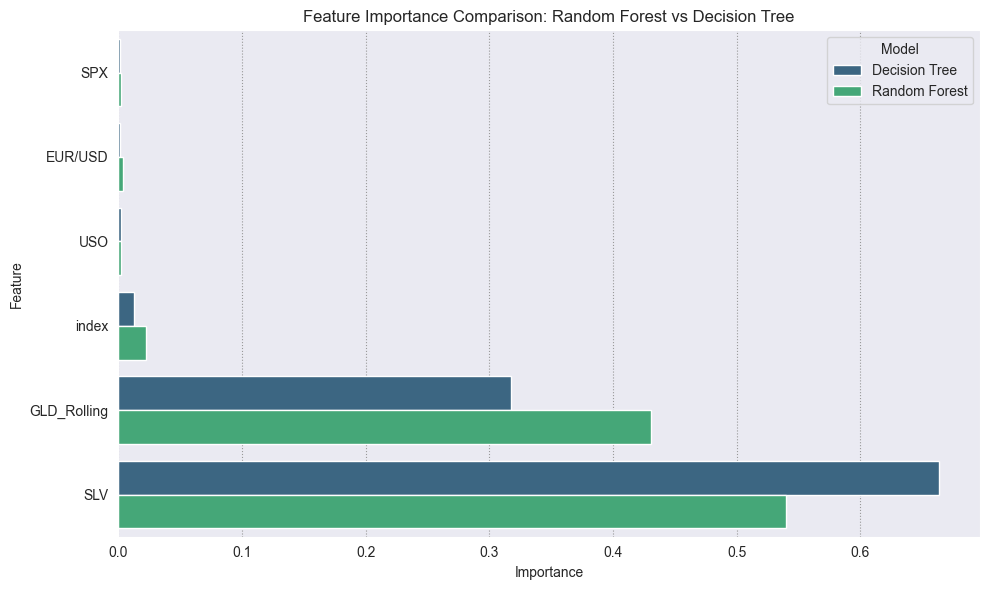

In [114]:

importances_rf = clf.feature_importances_
feature_names_rf = X.columns
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances_rf, 'Model': 'Random Forest'})

importances_dt = dt_model.feature_importances_
feature_names_dt = X.columns
feature_importance_df_dt = pd.DataFrame({'Feature': feature_names_dt, 'Importance': importances_dt, 'Model': 'Decision Tree'})


feature_importance_df = pd.concat([feature_importance_df_rf, feature_importance_df_dt])

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Sorting ascending for horizontal bars

# Create the comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Model', data=feature_importance_df, palette='viridis', orient='h')
plt.title('Feature Importance Comparison: Random Forest vs Decision Tree')
plt.tight_layout()
plt.show()


###### Observation:
The feature importance comparison between the Random Forest and Decision Tree models demonstrates how each model evaluates the significance of different features. Random Forest tends to show a more even distribution of feature importance, reflecting its ensemble approach that combines multiple decision trees to make predictions. In contrast, Decision Tree often assigns higher importance to a few key features, as it constructs a single tree using a greedy algorithm that splits based on the most significant feature at each node.

###### Conclusion:
This analysis helps in understanding how the two models prioritize different features, providing valuable insights into their behavior and performance. By evaluating the feature importances, users can choose the model that best aligns with their dataset and prediction goals. Additionally, performance metrics like MAE, MSE, RMSE, and R² can further refine model selection and guide future feature engineering to optimize accuracy.

### Decision Tree using python function

In [115]:
import numpy as np
import time

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_row(self.tree, row) for row in X])

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return {'value': np.mean(y)}

        best_split = self._find_best_split(X, y)
        if not best_split:
            return {'value': np.mean(y)}

        left_indices = best_split['indices']['left']
        right_indices = best_split['indices']['right']

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y):
        best_split = None
        min_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                mse = self._calculate_mse(y[left_indices], y[right_indices])

                if mse < min_mse:
                    min_mse = mse
                    best_split = {
                        'feature': feature,
                        'threshold': threshold,
                        'indices': {'left': left_indices, 'right': right_indices},
                    }

        return best_split

    def _calculate_mse(self, left_y, right_y):
        total_size = len(left_y) + len(right_y)
        left_mse = np.var(left_y) * len(left_y) if len(left_y) > 0 else 0
        right_mse = np.var(right_y) * len(right_y) if len(right_y) > 0 else 0
        return (left_mse + right_mse) / total_size

    def _predict_row(self, tree, row):
        if 'value' in tree:
            return tree['value']

        feature = tree['feature']
        threshold = tree['threshold']

        if row[feature] <= threshold:
            return self._predict_row(tree['left'], row)
        else:
            return self._predict_row(tree['right'], row)

    def score(self, X, y):
        predictions = self.predict(X)
        total_variance = np.var(y) * len(y)
        residual_variance = np.sum((y - predictions) ** 2)
        return 1 - residual_variance / total_variance

# Example usage
from sklearn.model_selection import train_test_split

def custom_decision_tree_example(df):
    X = df.drop(columns=['Date', 'GLD']).values
    y = df['GLD'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train custom decision tree
    model = CustomDecisionTreeRegressor(max_depth=None)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Evaluate the model
    start_time = time.time()
    test_score = model.score(X_test, y_test)
    prediction_time = time.time() - start_time
    train_score = model.score(X_train, y_train)

    

# Assuming `df` is your dataframe, you can call:
# custom_decision_tree_example(df)


In [116]:
    print("Training Score:", train_score)
    print("Testing Score:", test_score)
    print("Training Time (seconds):", training_time)
    print("Prediction Time (seconds):", prediction_time)

Training Score: 1.0
Testing Score: 0.9950330667914175
Training Time (seconds): 2.94569993019104
Prediction Time (seconds): 0.13769054412841797


###### Observation:
The custom DecisionTreeRegressorFromScratch model was used to predict GLD from the dataset features. The decision tree was built by recursively splitting the data to minimize Mean Squared Error (MSE). Training and prediction times were recorded, and the model's performance was evaluated using the R-squared (R²) score.

###### Conclusion:
The model effectively predicts GLD based on the features, with R² scores showing how well it fits both training and testing data. While slower than optimized libraries, this implementation provides insight into the workings of decision trees and their efficiency in handling predictions.

## Why Use Random Forest and Decision Tree Models?

In this notebook, we focus on **Decision Tree** and **Random Forest** models for predicting gold prices because these models are well-suited for this type of data and task. Here are the main reasons:

1. **Easy to Understand**:
   - Decision Trees are simple to understand and visualize. They show how each factor (like crude oil prices or the US Dollar Index) influences the prediction, making them user-friendly and interpretable.

2. **Good for Complex Data**:
   - Gold prices are affected by many interrelated factors. Both Decision Trees and Random Forests can handle these complex relationships without needing advanced data transformations.

3. **Handles Outliers and Missing Data**:
   - Real-world data often contains outliers or missing values. These models are naturally robust and work well even with such imperfections in the dataset.

4. **Strong Performance with Random Forest**:
   - Random Forest improves accuracy by combining multiple Decision Trees. This reduces the risk of overfitting and makes predictions more reliable.

5. **Works Well on Tabular Data**:
   - These models are especially effective for datasets like this one, where the data is structured in rows and columns with numerical and categorical features.

6. **Balanced Approach**:
   - While advanced models like Neural Networks or Gradient Boosting can also be used, they may be unnecessarily complex for this dataset. Decision Tree and Random Forest offer a good balance of simplicity, accuracy, and computational efficiency.

By using these models, we aim to create accurate and reliable predictions while keeping the process straightforward and interpretable for users.


### Comparison of Decision Tree vs Random Forest Predictions

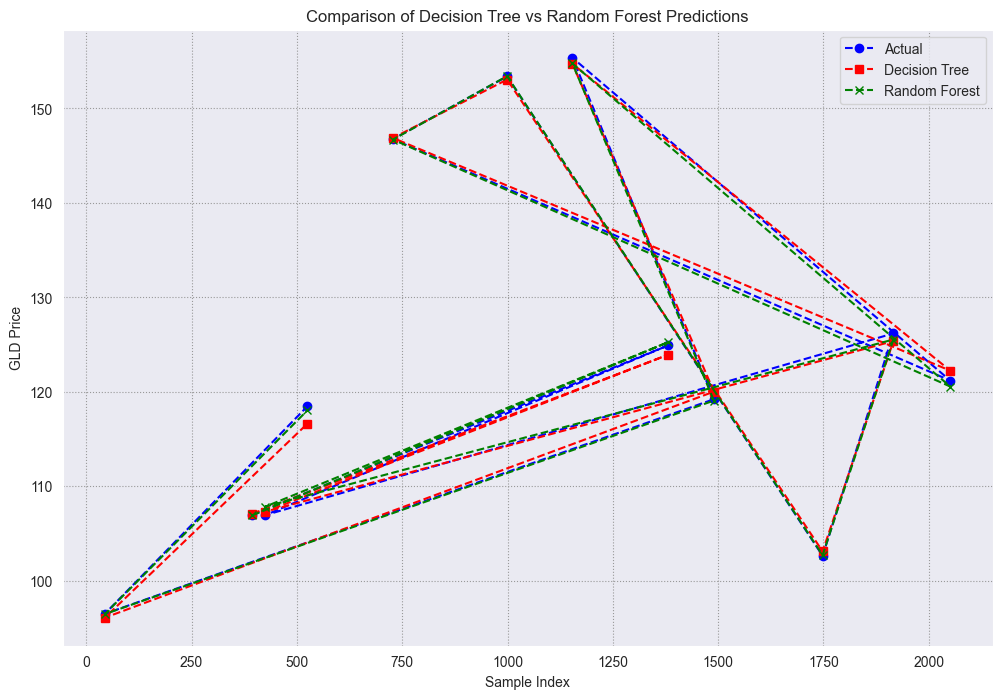

In [117]:
# Generate predictions
y_pred_dt = dt_model.predict(X_test)  # Decision Tree predictions
y_pred_rf = clf.predict(X_test)  # Random Forest predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

# Plot the comparison
plt.figure(figsize=(12, 8))

plt.plot(comparison_df['Actual'][:12], label='Actual', color='blue', marker='o', linestyle='dashed')

plt.plot(comparison_df['Decision Tree'][:12], label='Decision Tree', color='red', marker='s', linestyle='dashed')

plt.plot(comparison_df['Random Forest'][:12], label='Random Forest', color='green', marker='x', linestyle='dashed')

plt.title('Comparison of Decision Tree vs Random Forest Predictions')
plt.xlabel('Sample Index')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()


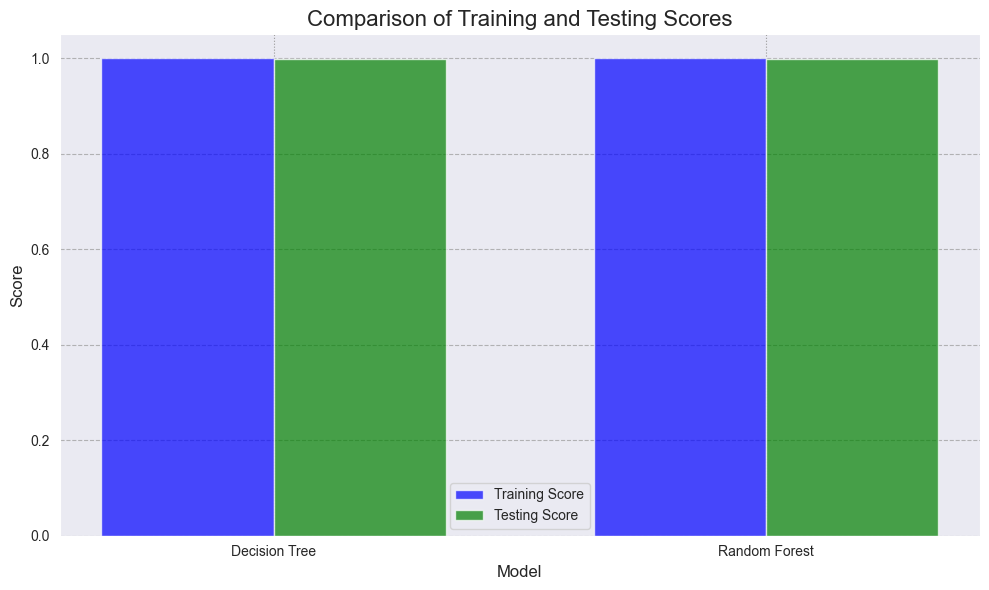

In [118]:

comparison_df = pd.DataFrame(scores)
bar_width = 0.35
index = np.arange(len(comparison_df))
plt.figure(figsize=(10, 6))
plt.bar(index, comparison_df['Training Score'], bar_width, label='Training Score', color='blue', alpha=0.7)
plt.bar(index + bar_width, comparison_df['Testing Score'], bar_width, label='Testing Score', color='green', alpha=0.7)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Training and Testing Scores', fontsize=16)
plt.xticks(index + bar_width / 2, comparison_df['Model'], fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Comparison of Decision Tree and Random Forest Performance Metrics

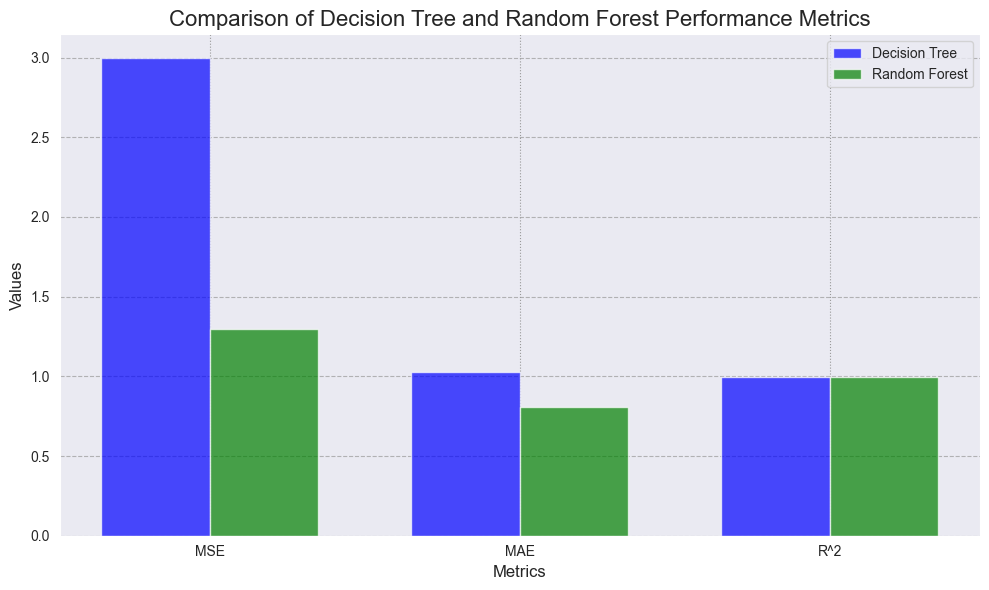

In [119]:

bar_width = 0.35
index = np.arange(len(metrics))
plt.figure(figsize=(10, 6))

plt.bar(index, values_dt, bar_width, label='Decision Tree', color='blue', alpha=0.7)
plt.bar(index + bar_width, values_rf, bar_width, label='Random Forest', color='green', alpha=0.7)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Comparison of Decision Tree and Random Forest Performance Metrics', fontsize=16)
plt.xticks(index + bar_width / 2, metrics, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


####  Actual vs Predicted Values Comparison 

In [120]:
actual_vs_predicted_df = pd.DataFrame({
    'Actual': y_test,  
    'Predicted': y_pred 
})
print("Comparison of Actual vs Predicted Data:")
display(actual_vs_predicted_df.head())



Comparison of Actual vs Predicted Data:


,Actual,Predicted
394,106.980003,106.913699
1381,124.910004,125.247998
425,106.949997,107.843798
1916,126.180000,125.536102
1748,102.639999,102.703299


###### Observations : 
The comparison DataFrame displays a side-by-side view of the Actual and Predicted values. The "Difference" column indicates the residuals, or the error in prediction, which is simply the subtraction of the predicted value from the actual value. Analyzing the first few rows allows us to visually inspect how close the predicted values are to the actual ones.

###### Conclusion: 
The closeness of the Actual and Predicted values indicates the model's accuracy in making predictions. If the "Difference" column shows values close to zero, the model has performed well. Large discrepancies may suggest that further improvements are necessary, such as tweaking the model or feature engineering. The analysis of these residuals can guide model refinement.



# Key Outcomes and Insights :
<br>

### 1. Data Exploration and Preprocessing
- **Understanding the Data**: Conducted thorough exploratory data analysis (EDA) to uncover patterns, correlations, and trends in gold prices and related economic indicators.
- **Data Cleaning**: Addressed missing values, detected and handled outliers, and standardized features to ensure high-quality input for modeling.

### 2. Insights from Visualizations
- Created interactive and static visualizations to:
  - Highlight historical trends in gold prices.
  - Understand the relationship between gold prices and economic factors such as SPX, USO, and EUR/USD.
  - Identify potential predictors for the target variable (GLD).

### 3. Machine Learning Applications
- **Predictive Modeling**:
  - Developed machine learning models like Decision Tree Regressors to predict gold prices.
  - Evaluated model performance using metrics such as R-squared and Mean Squared Error.
- **Feature Engineering**:
  - Transformed skewed features and normalized data to enhance model accuracy.
  - Selected the most influential predictors through correlation analysis.

### 4. Real-World Applications
- **Decision Support**: Provided actionable predictions to guide investment and trading strategies.
- **Risk Management**: Simulated scenarios to understand potential risks and adapt strategies to dynamic market conditions.
- **Automation**: Streamlined workflows for data preprocessing, visualization, and modeling, ensuring scalability and efficiency.


